In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:

beach_quality_df = pd.read_csv('Resources/Beach_Water_Quality.csv')
beach_quality_df.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,6/2/19 17:00,17.1,0.78,NaN,0.232,4.0,10.9,6/2/19 17:00,OhioStreetBeach201906021700
1,63rd Street Beach,9/18/13 10:00,18.9,7.56,1.517,0.140,4.0,11.0,9/18/13 10:00,63rdStreetBeach201309181000
2,63rd Street Beach,6/12/14 12:00,25.4,3.45,-0.072,0.031,9.0,12.2,6/12/14 12:00,63rdStreetBeach201406121200
3,63rd Street Beach,6/12/14 13:00,18.1,3.31,1.818,0.339,10.0,12.2,6/12/14 13:00,63rdStreetBeach201406121300
4,63rd Street Beach,6/12/14 14:00,17.5,2.93,1.545,0.136,4.0,12.2,6/12/14 14:00,63rdStreetBeach201406121400


In [3]:
beach_quality_df['Turbidity'].head()

0    0.78
1    7.56
2    3.45
3    3.31
4    2.93
Name: Turbidity, dtype: float64

In [4]:
beach_quality_df['Beach Name'].count()

39469

In [5]:
turbidity_means = beach_quality_df.groupby("Beach Name")["Turbidity"].mean()
turbidity_means

Beach Name
63rd Street Beach    4.313150
Calumet Beach        1.886594
Montrose Beach       2.898791
Ohio Street Beach    5.951276
Osterman Beach       8.707598
Rainbow Beach        3.164116
Name: Turbidity, dtype: float64

In [6]:
beach_quality_df.shape

(39469, 10)

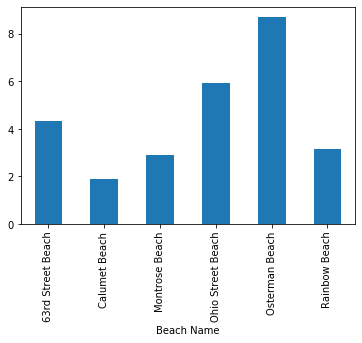

In [7]:
x = turbidity_means.plot.bar()

In [8]:
selected_beach_quality_df = beach_quality_df[['Beach Name','Measurement Timestamp','Water Temperature','Turbidity','Wave Height', 'Wave Period']].copy()
selected_beach_quality_df.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period
0,Ohio Street Beach,6/2/19 17:00,17.1,0.78,0.232,4.0
1,63rd Street Beach,9/18/13 10:00,18.9,7.56,0.140,4.0
2,63rd Street Beach,6/12/14 12:00,25.4,3.45,0.031,9.0
3,63rd Street Beach,6/12/14 13:00,18.1,3.31,0.339,10.0
4,63rd Street Beach,6/12/14 14:00,17.5,2.93,0.136,4.0


In [9]:
temperature = beach_quality_df.groupby("Beach Name")["Water Temperature"].mean()
temperature

Beach Name
63rd Street Beach    18.459901
Calumet Beach        20.373104
Montrose Beach       18.640534
Ohio Street Beach    20.339365
Osterman Beach       17.933615
Rainbow Beach        18.741250
Name: Water Temperature, dtype: float64

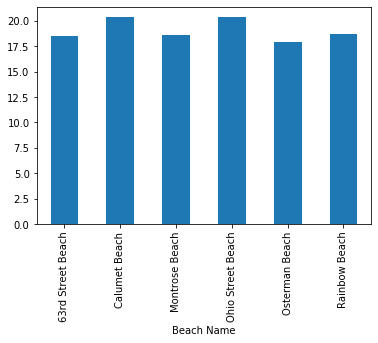

In [10]:
xtemps = temperature.plot.bar()

In [11]:
beach_quality_df.isnull().sum()

Beach Name                         0
Measurement Timestamp              0
Water Temperature                  0
Turbidity                          0
Transducer Depth               29435
Wave Height                      229
Wave Period                      227
Battery Life                       0
Measurement Timestamp Label        0
Measurement ID                     0
dtype: int64

In [12]:
beach_quality_df[beach_quality_df.Turbidity.isnull()]

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID


In [13]:
temperature = beach_quality_df.groupby("Beach Name")["Water Temperature"].mean()
temperature

Beach Name
63rd Street Beach    18.459901
Calumet Beach        20.373104
Montrose Beach       18.640534
Ohio Street Beach    20.339365
Osterman Beach       17.933615
Rainbow Beach        18.741250
Name: Water Temperature, dtype: float64

In [14]:
waves = beach_quality_df.groupby("Beach Name")["Wave Height"].mean()
waves

Beach Name
63rd Street Beach    -1347.386252
Calumet Beach            0.152585
Montrose Beach           0.202249
Ohio Street Beach     -287.751254
Osterman Beach           0.184694
Rainbow Beach       -13379.676708
Name: Wave Height, dtype: float64

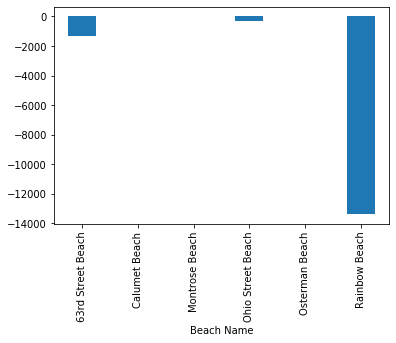

In [33]:
xwaves = waves.plot.bar()

In [15]:
beach_quality_df.dropna(subset= ['Wave Height']).shape

(39240, 10)

In [16]:
waves.replace('', np.NaN)

Beach Name
63rd Street Beach    -1347.386252
Calumet Beach            0.152585
Montrose Beach           0.202249
Ohio Street Beach     -287.751254
Osterman Beach           0.184694
Rainbow Beach       -13379.676708
Name: Wave Height, dtype: float64

In [17]:
beach_quality_df.columns = [c.replace(' ', '_') for c in beach_quality_df.columns]

In [18]:
beach_quality_df.columns

Index(['Beach_Name', 'Measurement_Timestamp', 'Water_Temperature', 'Turbidity',
       'Transducer_Depth', 'Wave_Height', 'Wave_Period', 'Battery_Life',
       'Measurement_Timestamp_Label', 'Measurement_ID'],
      dtype='object')

In [19]:
beach_quality_df[beach_quality_df.Wave_Height<0]

,Beach_Name,Measurement_Timestamp,Water_Temperature,Turbidity,Transducer_Depth,Wave_Height,Wave_Period,Battery_Life,Measurement_Timestamp_Label,Measurement_ID
3375,63rd Street Beach,9/11/15 19:00,20.0,5.83,NaN,-99999.992,-100000.0,10.6,9/11/15 19:00,63rdStreetBeach201509111900
3376,63rd Street Beach,9/11/15 21:00,19.5,8.81,NaN,-99999.992,-100000.0,5.6,9/11/15 21:00,63rdStreetBeach201509112100
3377,63rd Street Beach,9/11/15 22:00,19.2,14.59,NaN,-99999.992,-100000.0,5.3,9/11/15 22:00,63rdStreetBeach201509112200
3378,63rd Street Beach,9/11/15 23:00,19.1,9.56,NaN,-99999.992,-100000.0,5.5,9/11/15 23:00,63rdStreetBeach201509112300
3380,63rd Street Beach,9/12/15 1:00,19.2,14.10,NaN,-99999.992,-100000.0,5.4,9/12/15 1:00,63rdStreetBeach201509120100
...,...,...,...,...,...,...,...,...,...,...
34914,Rainbow Beach,10/1/15 2:00,16.2,55.64,NaN,-99999.992,-100000.0,9.5,10/1/15 2:00,RainbowBeach201510010200
34915,Rainbow Beach,10/1/15 3:00,16.2,21.96,NaN,-99999.992,-100000.0,5.3,10/1/15 3:00,RainbowBeach201510010300
34916,Rainbow Beach,10/1/15 4:00,15.8,0.15,NaN,-99999.992,-100000.0,10.4,10/1/15 4:00,RainbowBeach201510010400
34917,Rainbow Beach,10/1/15 5:00,15.9,8.59,NaN,-99999.992,-100000.0,5.7,10/1/15 5:00,RainbowBeach201510010500


In [20]:
negatives = beach_quality_df[beach_quality_df['Wave_Height'] < 0]
negatives

,Beach_Name,Measurement_Timestamp,Water_Temperature,Turbidity,Transducer_Depth,Wave_Height,Wave_Period,Battery_Life,Measurement_Timestamp_Label,Measurement_ID
3375,63rd Street Beach,9/11/15 19:00,20.0,5.83,NaN,-99999.992,-100000.0,10.6,9/11/15 19:00,63rdStreetBeach201509111900
3376,63rd Street Beach,9/11/15 21:00,19.5,8.81,NaN,-99999.992,-100000.0,5.6,9/11/15 21:00,63rdStreetBeach201509112100
3377,63rd Street Beach,9/11/15 22:00,19.2,14.59,NaN,-99999.992,-100000.0,5.3,9/11/15 22:00,63rdStreetBeach201509112200
3378,63rd Street Beach,9/11/15 23:00,19.1,9.56,NaN,-99999.992,-100000.0,5.5,9/11/15 23:00,63rdStreetBeach201509112300
3380,63rd Street Beach,9/12/15 1:00,19.2,14.10,NaN,-99999.992,-100000.0,5.4,9/12/15 1:00,63rdStreetBeach201509120100
...,...,...,...,...,...,...,...,...,...,...
34914,Rainbow Beach,10/1/15 2:00,16.2,55.64,NaN,-99999.992,-100000.0,9.5,10/1/15 2:00,RainbowBeach201510010200
34915,Rainbow Beach,10/1/15 3:00,16.2,21.96,NaN,-99999.992,-100000.0,5.3,10/1/15 3:00,RainbowBeach201510010300
34916,Rainbow Beach,10/1/15 4:00,15.8,0.15,NaN,-99999.992,-100000.0,10.4,10/1/15 4:00,RainbowBeach201510010400
34917,Rainbow Beach,10/1/15 5:00,15.9,8.59,NaN,-99999.992,-100000.0,5.7,10/1/15 5:00,RainbowBeach201510010500


In [21]:
newdf=beach_quality_df[beach_quality_df.Wave_Height > 0]
newdf

,Beach_Name,Measurement_Timestamp,Water_Temperature,Turbidity,Transducer_Depth,Wave_Height,Wave_Period,Battery_Life,Measurement_Timestamp_Label,Measurement_ID
0,Ohio Street Beach,6/2/19 17:00,17.1,0.78,NaN,0.232,4.0,10.9,6/2/19 17:00,OhioStreetBeach201906021700
1,63rd Street Beach,9/18/13 10:00,18.9,7.56,1.517,0.140,4.0,11.0,9/18/13 10:00,63rdStreetBeach201309181000
2,63rd Street Beach,6/12/14 12:00,25.4,3.45,-0.072,0.031,9.0,12.2,6/12/14 12:00,63rdStreetBeach201406121200
3,63rd Street Beach,6/12/14 13:00,18.1,3.31,1.818,0.339,10.0,12.2,6/12/14 13:00,63rdStreetBeach201406121300
4,63rd Street Beach,6/12/14 14:00,17.5,2.93,1.545,0.136,4.0,12.2,6/12/14 14:00,63rdStreetBeach201406121400
...,...,...,...,...,...,...,...,...,...,...
39462,Ohio Street Beach,9/7/19 15:00,19.2,20.78,NaN,0.192,4.0,10.5,9/7/19 15:00,OhioStreetBeach201909071500
39464,Calumet Beach,9/20/16 13:00,21.7,3.15,NaN,0.389,3.0,9.4,9/20/16 13:00,CalumetBeach201609201300
39465,Montrose Beach,9/14/16 19:00,21.9,0.01,NaN,0.360,3.0,9.4,9/14/16 19:00,MontroseBeach201609141900
39466,Ohio Street Beach,9/11/19 11:00,23.8,0.00,NaN,0.028,10.0,10.2,9/11/19 11:00,OhioStreetBeach201909111100


In [22]:
Wave_Height = newdf.groupby("Beach_Name")["Wave_Height"].mean()
Wave_Height

Beach_Name
63rd Street Beach    0.155694
Calumet Beach        0.152585
Montrose Beach       0.202249
Ohio Street Beach    0.163972
Osterman Beach       0.184694
Rainbow Beach        0.203868
Name: Wave_Height, dtype: float64

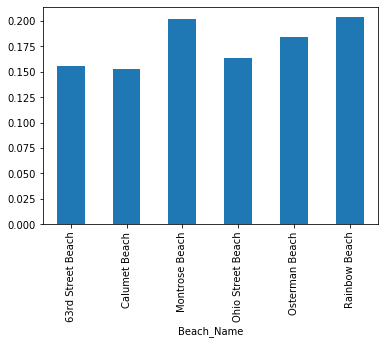

In [23]:
xwaves = Wave_Height.plot.bar()

In [24]:
beach_advisory_df = pd.read_csv('Resources/Beach_Swim_Advisories.csv')
beach_advisory_df.head()

,Beach Name,Date,Predicted Level,Probability,Swim Advisory,RecordID
0,63rdStreet,6/4/16,33.6,0.106,N,63rdStreet20160604
1,Calumet,6/4/16,33.8,0.107,N,Calumet20160604
2,Foster,6/4/16,14.9,0.021,N,Foster20160604
3,Leone,6/4/16,9.6,0.006,N,Leone20160604
4,Montrose,6/4/16,101.5,0.277,N,Montrose20160604


In [25]:
beach_advisory_df.shape

(972, 6)

In [26]:
selected_beach_advisory_df = beach_advisory_df[['Beach Name','Predicted Level', 'Swim Advisory']].copy()
selected_beach_advisory_df.head()

,Beach Name,Predicted Level,Swim Advisory
0,63rdStreet,33.6,N
1,Calumet,33.8,N
2,Foster,14.9,N
3,Leone,9.6,N
4,Montrose,101.5,N


In [27]:
selected_beach_advisory_df.groupby(['Beach Name','Swim Advisory']).count()
df1 = selected_beach_advisory_df.groupby(['Beach Name','Swim Advisory']).count()

In [28]:
beach_weather_df = pd.read_csv('Resources/Beach_Weather_Stations.csv')
beach_weather_df.head()

,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
0,63rd Street Weather Station,1/1/16 0:00,-2.80,-4.4,69,0.0,0.0,6.7,0.0,255,3.8,6.4,1000.5,5,353.0,11.9,1/1/16 0:00,63rdStreetWeatherStation201601012400
1,Foster Weather Station,1/1/16 0:00,-3.67,NaN,62,NaN,0.0,NaN,NaN,197,3.6,5.0,1000.0,0,NaN,15.2,1/1/16 0:00,FosterWeatherStation201601012400
2,Oak Street Weather Station,1/1/16 0:00,-2.30,-4.0,67,0.0,0.0,6.3,0.0,260,4.0,7.6,1000.5,3,359.0,12.1,1/1/16 0:00,OakStreetWeatherStation201601012400
3,63rd Street Weather Station,1/1/16 1:00,-3.40,-4.8,72,0.0,0.0,6.7,0.0,273,6.4,9.4,999.9,5,353.0,11.9,1/1/16 1:00,63rdStreetWeatherStation201601010100
4,Foster Weather Station,1/1/16 1:00,-4.56,NaN,63,NaN,0.0,NaN,NaN,290,5.9,6.6,999.3,0,NaN,14.8,1/1/16 1:00,FosterWeatherStation201601010100


In [29]:
beach_weather_df.shape

(23686, 18)

In [30]:
selected_beach_weather_df = beach_weather_df[['Station Name','Rain Intensity', 'Wind Speed']].copy()
selected_beach_weather_df.head()

,Station Name,Rain Intensity,Wind Speed
0,63rd Street Weather Station,0.0,3.8
1,Foster Weather Station,NaN,3.6
2,Oak Street Weather Station,0.0,4.0
3,63rd Street Weather Station,0.0,6.4
4,Foster Weather Station,NaN,5.9


In [31]:
beach_E_coli_df = pd.read_csv('Resources/Beach_E_Coli_Predictions.csv')
beach_E_coli_df.head()

,Beach Name,Date,Prediction Source,Predicted Level,RecordID,Latitude,Longitude,Location
0,12th Street,05/26/2017,DNA Model,160.0,12thStreet20170526,41.8638,-87.6082,"(41.8638, -87.6082)"
1,12th Street,05/27/2017,DNA Model,54.7,12thStreet20170527,41.8638,-87.6082,"(41.8638, -87.6082)"
2,12th Street,05/28/2017,DNA Model,85.9,12thStreet20170528,41.8638,-87.6082,"(41.8638, -87.6082)"
3,12th Street,05/29/2017,DNA Model,109.5,12thStreet20170529,41.8638,-87.6082,"(41.8638, -87.6082)"
4,12th Street,05/30/2017,DNA Model,53.2,12thStreet20170530,41.8638,-87.6082,"(41.8638, -87.6082)"


In [32]:
selected_beach_E_coli_df = beach_E_coli_df[['Beach Name','Date', 'Predicted Level','Latitude','Longitude','Location']].copy()
selected_beach_E_coli_df.head()

,Beach Name,Date,Predicted Level,Latitude,Longitude,Location
0,12th Street,05/26/2017,160.0,41.8638,-87.6082,"(41.8638, -87.6082)"
1,12th Street,05/27/2017,54.7,41.8638,-87.6082,"(41.8638, -87.6082)"
2,12th Street,05/28/2017,85.9,41.8638,-87.6082,"(41.8638, -87.6082)"
3,12th Street,05/29/2017,109.5,41.8638,-87.6082,"(41.8638, -87.6082)"
4,12th Street,05/30/2017,53.2,41.8638,-87.6082,"(41.8638, -87.6082)"
